In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

In [6]:
df = pd.read_csv('kalibrasi10-20.csv')
df.head()

,Timestamp,Tag ID,Speed
0,2024-06-09 12:45:17,E2-00-20-23-12-05-EE-AA-00-01-00-87,7.0
1,2024-06-09 12:45:17,E2-00-20-23-12-05-EE-AA-00-01-00-87,7.4
2,2024-06-09 12:45:17,E2-00-20-23-12-05-EE-AA-00-01-00-87,8.7
3,2024-06-09 12:45:17,E2-00-20-23-12-05-EE-AA-00-01-00-87,12.2
4,2024-06-09 12:45:18,E2-00-20-23-12-05-EE-AA-00-01-00-87,10.5


In [7]:
df2 = pd.read_csv('kalibrasi30-40.csv')
df2.head()

,2024-06-09 15:21:09,STAND BY,RFID IS READING,0.4
0,2024-06-09 15:21:09,STAND BY,RFID IS READING,0.9
1,2024-06-09 15:21:09,STAND BY,RFID IS READING,0.4
2,2024-06-09 15:21:10,STAND BY,RFID IS READING,0.9
3,2024-06-09 15:21:10,STAND BY,RFID IS READING,1.3
4,2024-06-09 15:21:10,STAND BY,RFID IS READING,0.9


In [10]:
df3 = pd.read_csv('D:\TA\KALIBRASI\kalibrasi 40 kedua.csv')
df3.head()

n = 3 

series = df3["Tag ID"]

series.head(n = n)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\1240454779.py:1: SyntaxWarning: invalid escape sequence '\T'
  df3 = pd.read_csv('D:\TA\KALIBRASI\kalibrasi 40 kedua.csv')


0    RFID IS READING
1    RFID IS READING
2    RFID IS READING
Name: Tag ID, dtype: object

In [12]:
print(df3.describe())

             Speed
count  1941.000000
mean     14.258423
std       7.556751
min       0.400000
25%       7.400000
50%      14.000000
75%      20.500000
max      34.500000


KALIBRASI 40 KEDUA

<>:38: SyntaxWarning: invalid escape sequence '\T'
<>:39: SyntaxWarning: invalid escape sequence '\T'
<>:40: SyntaxWarning: invalid escape sequence '\T'
<>:41: SyntaxWarning: invalid escape sequence '\T'
<>:38: SyntaxWarning: invalid escape sequence '\T'
<>:39: SyntaxWarning: invalid escape sequence '\T'
<>:40: SyntaxWarning: invalid escape sequence '\T'
<>:41: SyntaxWarning: invalid escape sequence '\T'
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\3371209051.py:38: SyntaxWarning: invalid escape sequence '\T'
  'D:\TA\KALIBRASI\kalibrasi30-40.csv',
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\3371209051.py:39: SyntaxWarning: invalid escape sequence '\T'
  'D:\TA\KALIBRASI\kalibrasi 40 kedua.csv',
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\3371209051.py:40: SyntaxWarning: invalid escape sequence '\T'
  'D:\TA\KALIBRASI\kalibrasi 40 ketiga.csv',
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\3371209051.py:41: SyntaxWarning: invalid escape sequence '\T'
  '

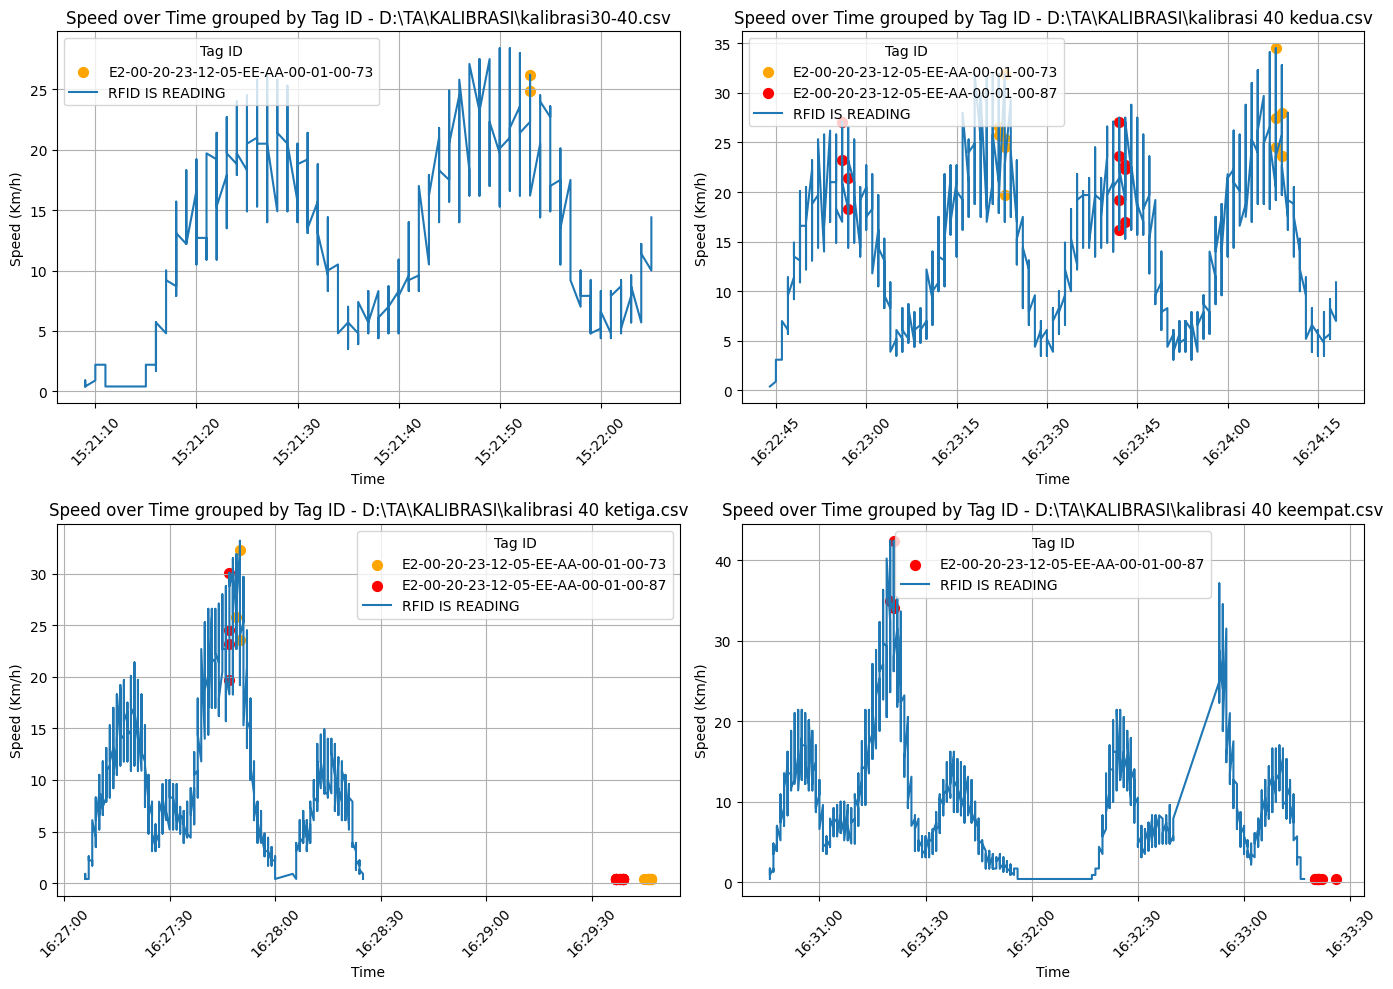

In [122]:
def process_and_plot(file_path, ax):
    # Load the data
    df = pd.read_csv(file_path)

    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Drop rows from index 951 to 1371
    df = df.drop(df.index[1707:1943])

    # Ensure the Speed column is numeric
    df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

    # Drop rows with NaN values in the Speed column
    df = df.dropna(subset=['Speed'])

    # Group by 'Tag ID'
    tag_groups = df.groupby('Tag ID')

    # Specific Tag IDs to highlight
    highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]

    for tag_id, group in tag_groups:
        if tag_id in highlight_tags:
            color = 'red' if tag_id == highlight_tags[0] else 'orange'
            ax.scatter(group['Timestamp'], group['Speed'], label=tag_id, s=50, marker='o', color=color)
        else:
            ax.plot(group['Timestamp'], group['Speed'], label=tag_id)

    ax.set_xlabel('Time')
    ax.set_ylabel('Speed (Km/h)')
    ax.set_title(f'Speed over Time grouped by Tag ID - {file_path}')
    ax.legend(title='Tag ID')
    ax.tick_params(axis='x', rotation=45)
    ax.grid()

# Daftar file paths
file_paths = [
    'D:\TA\KALIBRASI\kalibrasi30-40.csv',
    'D:\TA\KALIBRASI\kalibrasi 40 kedua.csv',
    'D:\TA\KALIBRASI\kalibrasi 40 ketiga.csv',
    'D:\TA\KALIBRASI\kalibrasi 40 keempat.csv'
]

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Process and plot each file
for i, file_path in enumerate(file_paths):
    process_and_plot(file_path, axes[i])

plt.tight_layout()
plt.show()

Grafik dari Kecepatan terhadap waktu

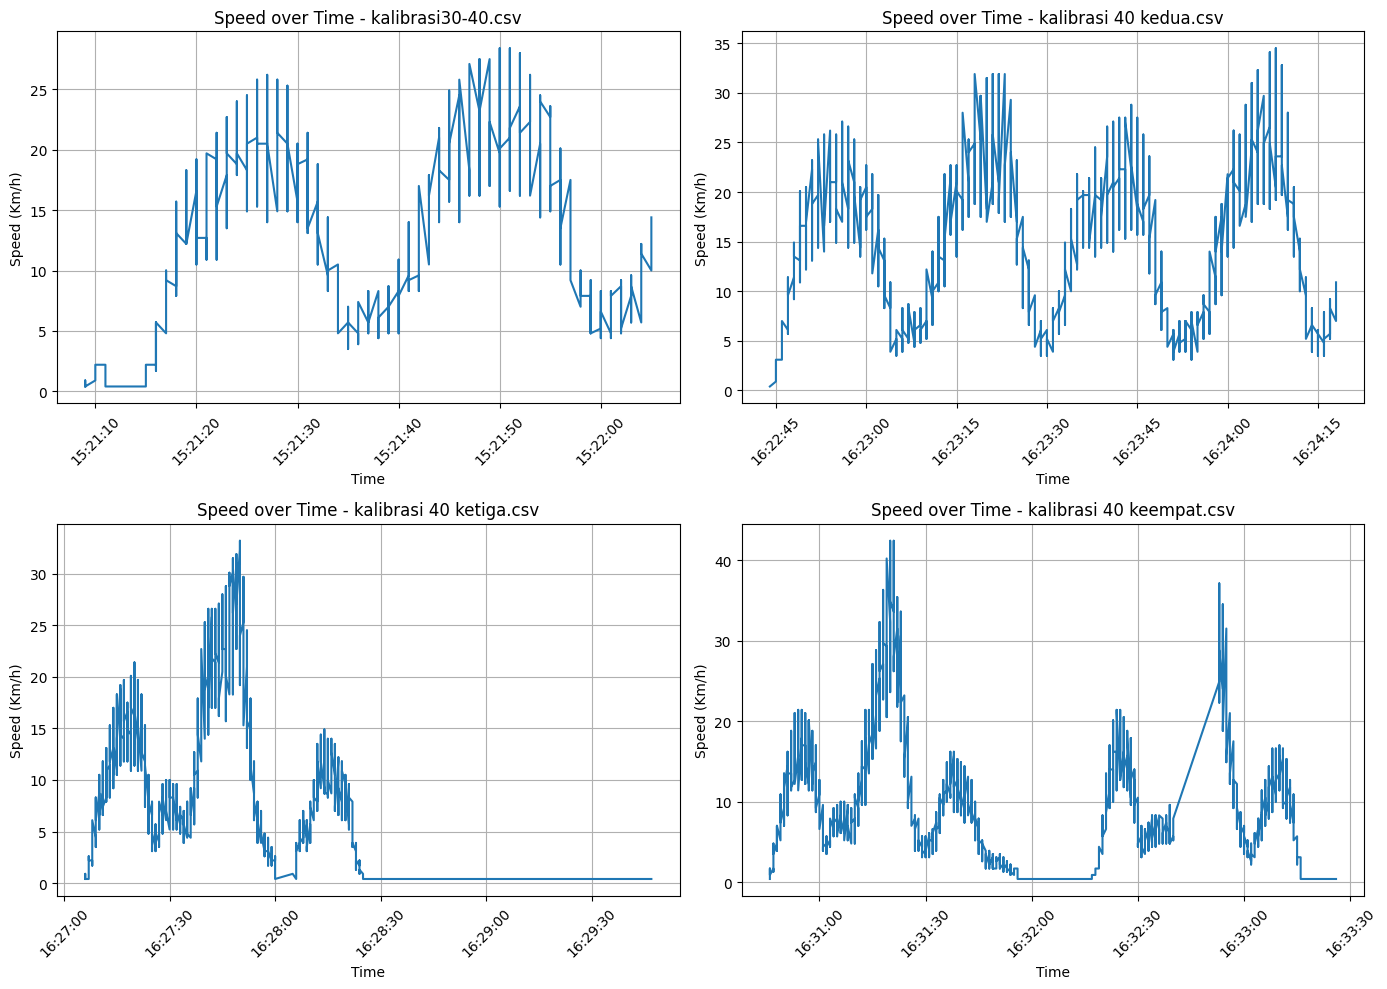

In [249]:
def process_and_plot(file_path, ax):
    # Load the data
    df = pd.read_csv(file_path)

    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Drop rows from index 1707 to 1943
    df = df.drop(df.index[1707:1943])

    # Ensure the Speed column is numeric
    df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

    # Drop rows with NaN values in the Speed column
    df = df.dropna(subset=['Speed'])

    # Plot the speed over time
    ax.plot(df['Timestamp'], df['Speed'])

    ax.set_xlabel('Time')
    ax.set_ylabel('Speed (Km/h)')
    ax.set_title(f'Speed over Time - {file_path}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid()

# Daftar file paths
file_paths = [
    'kalibrasi30-40.csv',
    'kalibrasi 40 kedua.csv',
    'kalibrasi 40 ketiga.csv',
    'kalibrasi 40 keempat.csv'
]

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Process and plot each file
for i, file_path in enumerate(file_paths):
    process_and_plot(file_path, axes[i])

plt.tight_layout()
plt.show()

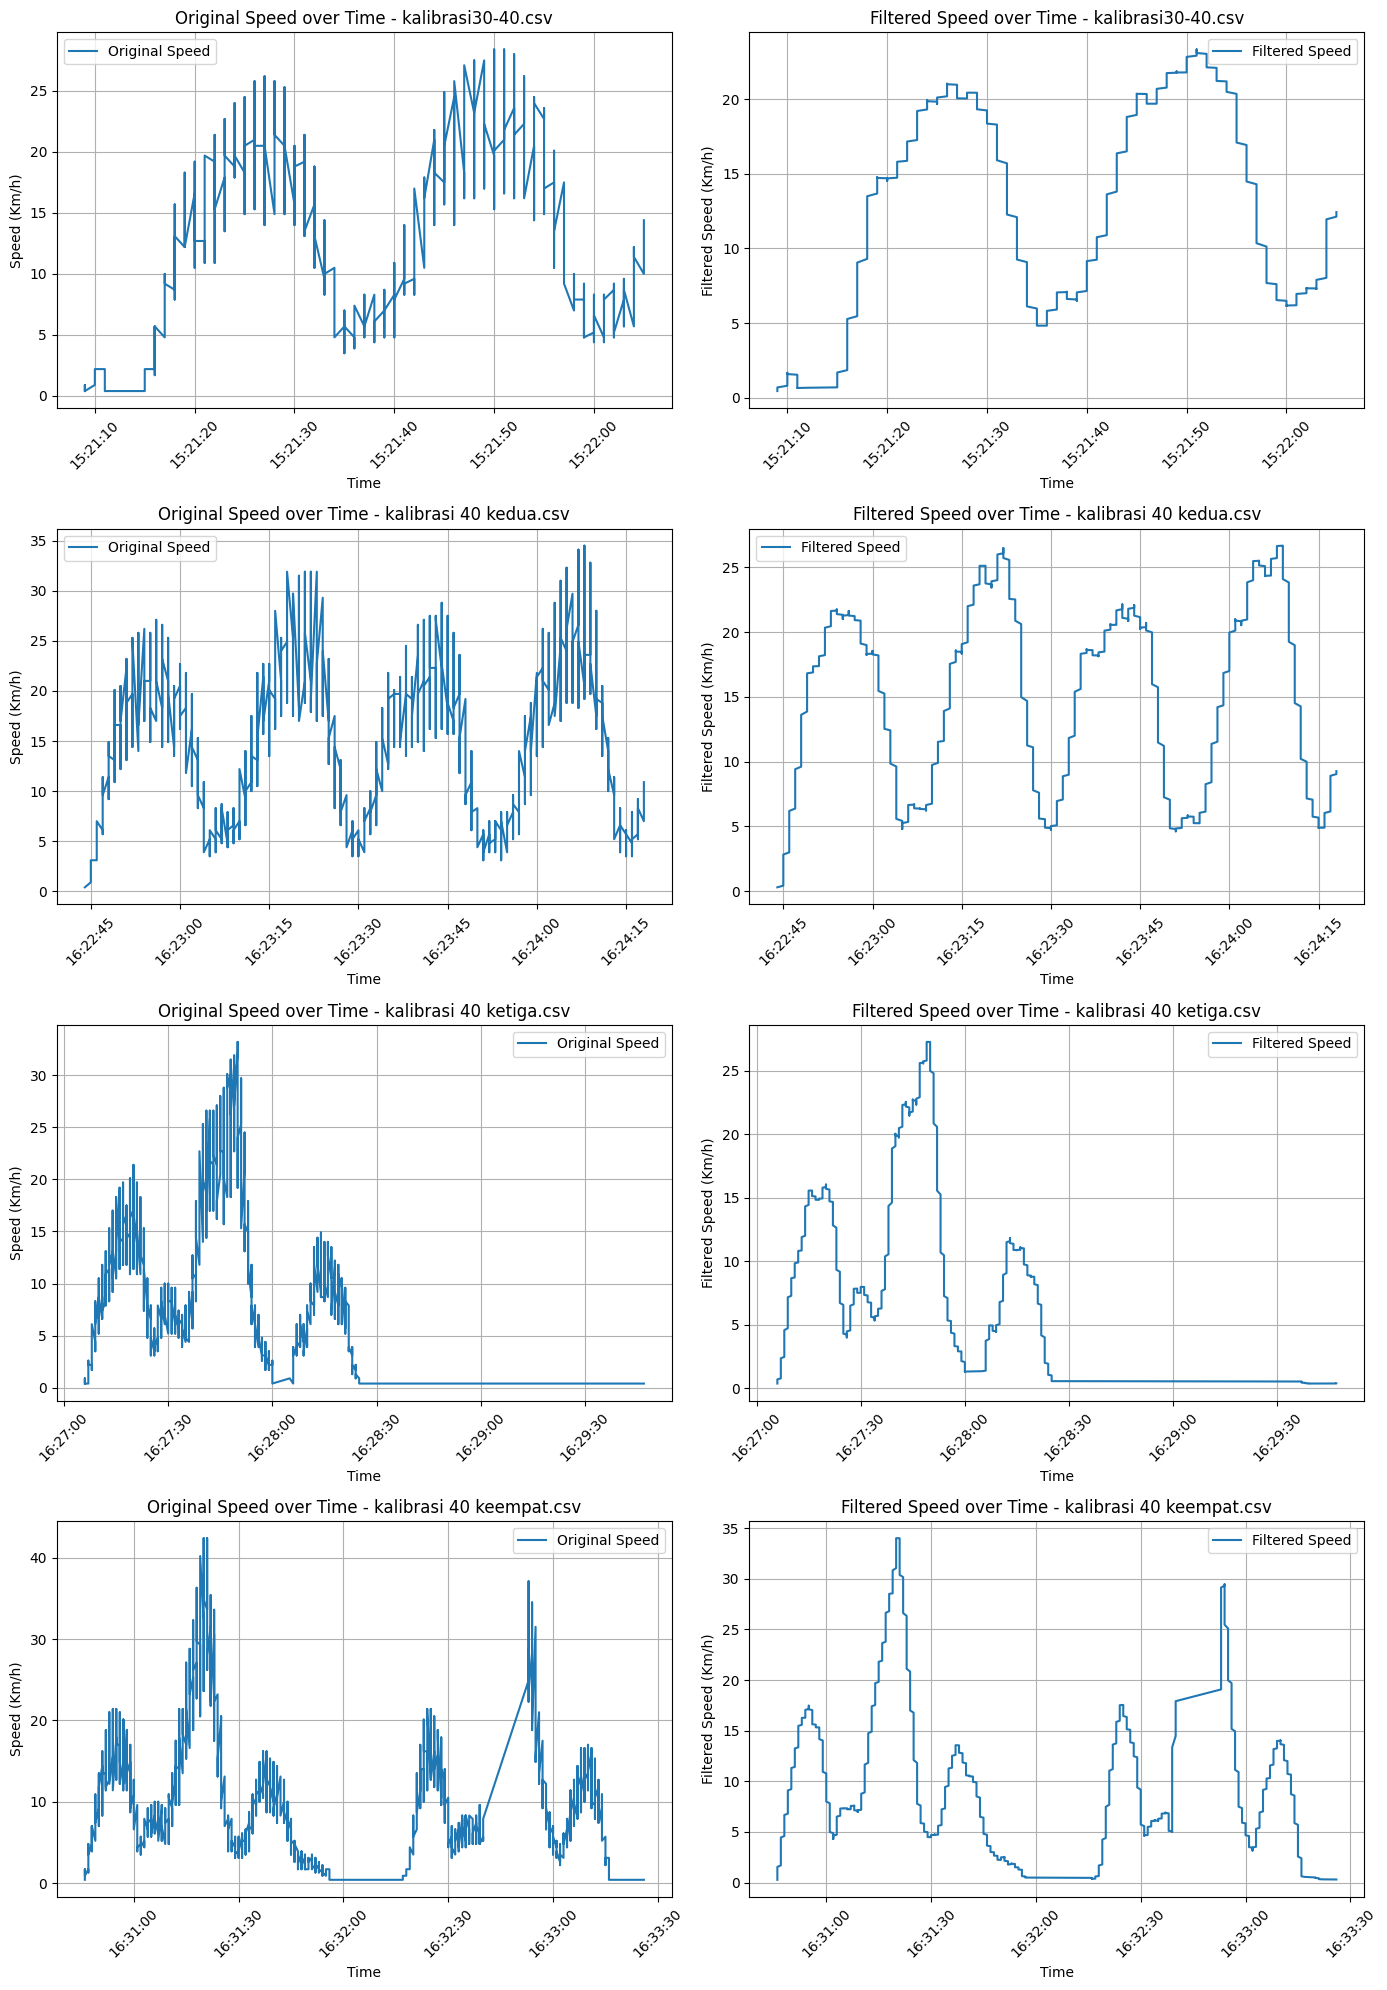

In [253]:
def process_and_plot(file_path, ax):
    # Load the data
    df = pd.read_csv(file_path)

    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Drop rows from index 1707 to 1943
    df = df.drop(df.index[1707:1943])

    # Ensure the Speed column is numeric
    df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

    # Drop rows with NaN values in the Speed column
    df = df.dropna(subset=['Speed'])

    # Plot the original speed over time
    ax[0].plot(df['Timestamp'], df['Speed'], label='Original Speed')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Speed (Km/h)')
    ax[0].set_title(f'Original Speed over Time - {file_path}')
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].legend()
    ax[0].grid()

    # Apply low-pass filter to the speed data
    filtered_speed_data = apply_low_pass_filter(df['Speed'])

    # Plot the filtered speed over time
    ax[1].plot(df['Timestamp'], filtered_speed_data, label='Filtered Speed')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Filtered Speed (Km/h)')
    ax[1].set_title(f'Filtered Speed over Time - {file_path}')
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].legend()
    ax[1].grid()

def apply_low_pass_filter(speed_data):
    # Define the cutoff frequency and filter order
    cutoff_frequency = 0.05  # Adjust as needed
    order = 4

    # Set up the low-pass filter
    b, a = butter(order, cutoff_frequency, btype='low')

    # Apply the filter to the speed data
    filtered_speed_data = filtfilt(b, a, speed_data)

    return filtered_speed_data

# Daftar file paths
file_paths = [
    'kalibrasi30-40.csv',
    'kalibrasi 40 kedua.csv',
    'kalibrasi 40 ketiga.csv',
    'kalibrasi 40 keempat.csv'
]

# Create a figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
axes = axes.flatten()

# Process and plot each file
for i, file_path in enumerate(file_paths):
    process_and_plot(file_path, axes[i*2:i*2+2])

plt.tight_layout()
plt.show()

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\4089122439.py:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  average_speed_per_second = df['Speed'].resample('1S').mean()
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\4089122439.py:32: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  group_average = group['Speed'].resample('1S').mean()
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\4089122439.py:32: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  group_average = group['Speed'].resample('1S').mean()


              Timestamp      Speed
0   2024-06-09 16:22:44   0.400000
1   2024-06-09 16:22:45   1.605882
2   2024-06-09 16:22:46   4.611111
3   2024-06-09 16:22:47   7.772222
4   2024-06-09 16:22:48  11.433333
..                  ...        ...
111 2024-06-09 16:24:35        NaN
112 2024-06-09 16:24:36   0.400000
113 2024-06-09 16:24:37   0.400000
114 2024-06-09 16:24:38   0.400000
115 2024-06-09 16:24:39   0.400000

[116 rows x 2 columns]
                    Tag Status                               Tag ID  Speed
Timestamp                                                                 
2024-06-09 16:22:56      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   23.2
2024-06-09 16:22:56      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   27.1
2024-06-09 16:22:57      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   18.3
2024-06-09 16:22:57      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   21.4
2024-06-09 16:23:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   27.1
2024-06-09 16:23:42      TAG 4 

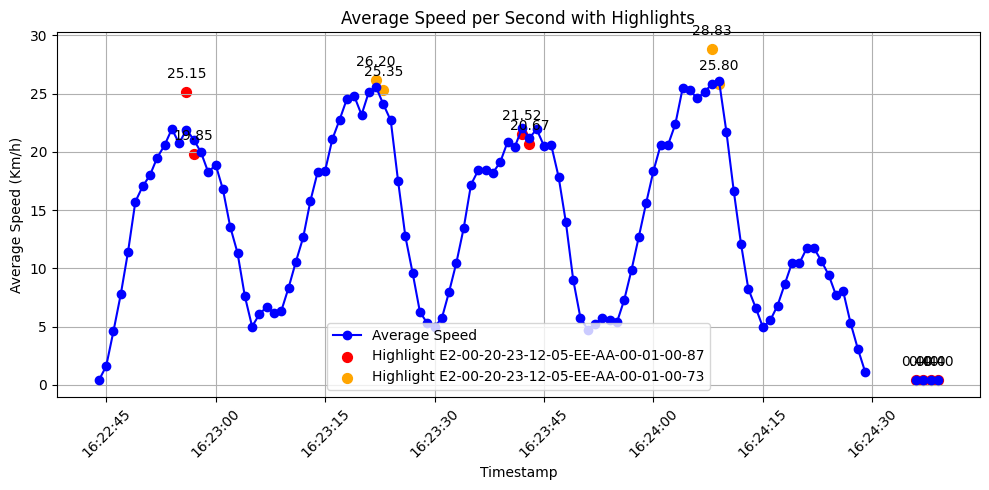

In [203]:
# Assuming 'df' is your DataFrame containing the CSV data
df = pd.read_csv("kalibrasi 40 kedua.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the index
df.set_index('Timestamp', inplace=True)

# Resample the data in 1-second intervals and calculate the mean speed
average_speed_per_second = df['Speed'].resample('1S').mean()

# Reset the index to turn the Timestamp back into a column
average_speed_per_second = average_speed_per_second.reset_index()

# Print the result
print(average_speed_per_second)

# Plotting the average speed per second
plt.figure(figsize=(10, 5))
plt.plot(average_speed_per_second['Timestamp'], average_speed_per_second['Speed'], marker='o', color='b', label='Average Speed')

# Highlight specific tags and annotate with speed
highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['red', 'orange']

# Group by 'Tag ID' and plot highlights with annotations
tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        print(group)
        # Resample the group in 1-second intervals and calculate the mean speed
        group_average = group['Speed'].resample('1S').mean()
        plt.scatter(group_average.index, group_average, label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        # Annotate each point with its speed value using the correct method 'items()'
        for time, speed in group_average.items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Average Speed per Second with Highlights')
plt.xlabel('Timestamp')
plt.ylabel('Average Speed (Km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.grid()
plt.show()

Kalibrasi 40 Kedua

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\3781400935.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  average_speed_per_second = df['Speed'].resample('1S').mean()


                    Tag Status                               Tag ID  Speed
Timestamp                                                                 
2024-06-09 16:22:56      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   23.2
2024-06-09 16:22:56      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   27.1
2024-06-09 16:22:57      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   18.3
2024-06-09 16:22:57      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   21.4
2024-06-09 16:23:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   27.1
2024-06-09 16:23:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   23.6
2024-06-09 16:23:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   19.2
2024-06-09 16:23:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   16.2
2024-06-09 16:23:43      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   22.3
2024-06-09 16:23:43      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   17.0
2024-06-09 16:23:43      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   22.7
                    Tag S

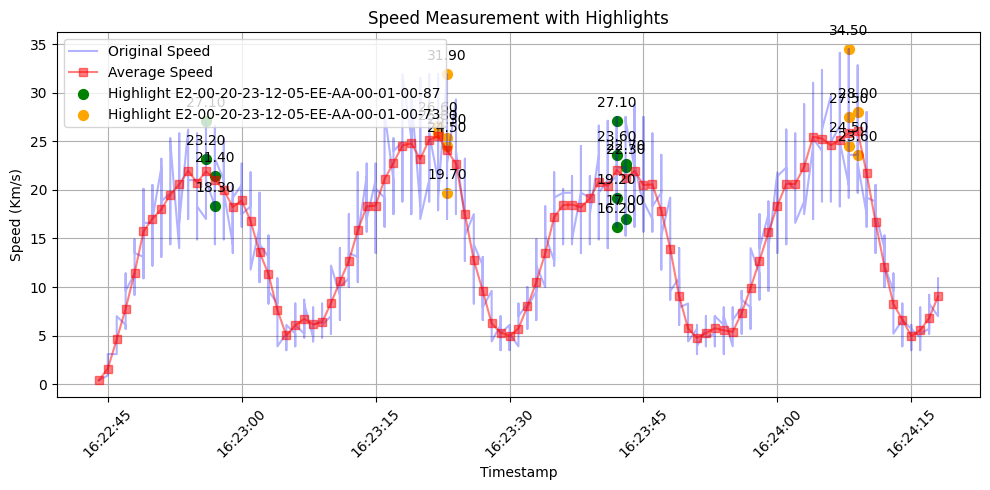

In [254]:
df = pd.read_csv('kalibrasi 40 kedua.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(df.index[1707:1943])

df.set_index('Timestamp', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-',alpha=0.3)

average_speed_per_second = df['Speed'].resample('1S').mean()

plt.plot(average_speed_per_second.index, average_speed_per_second, marker='s', color='red', label='Average Speed',alpha = 0.5)

highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['green', 'orange']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        print(group)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/s)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

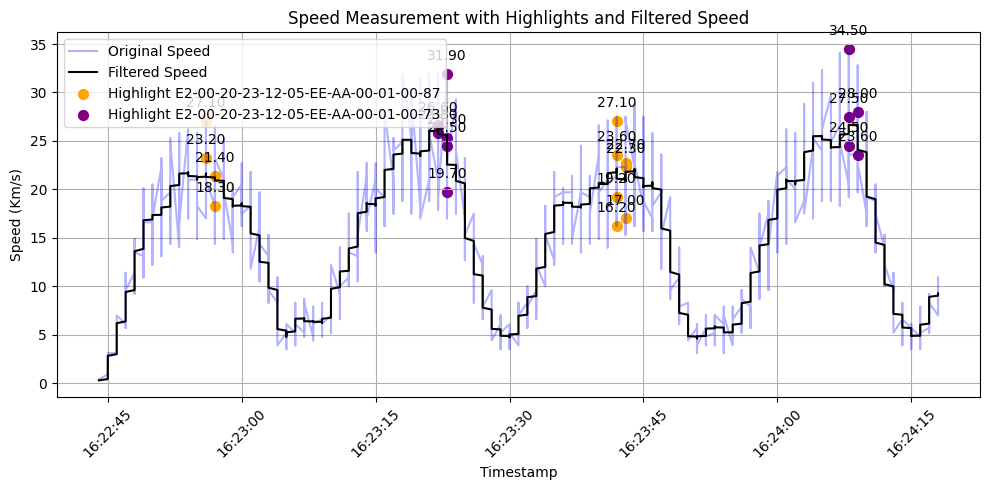

In [298]:
def apply_low_pass_filter(speed_data):
    cutoff_frequency = 0.05
    order = 4

    # Set up the low-pass filter
    b, a = butter(order, cutoff_frequency, btype='low')

    # Apply the filter to the speed data
    filtered_speed_data = filtfilt(b, a, speed_data)

    return filtered_speed_data

df = pd.read_csv('kalibrasi 40 kedua.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])   
df = df.drop(df.index[1707:1943])

df.set_index('Timestamp', inplace=True)

# Apply low-pass filter to the speed data
df['Filtered Speed'] = apply_low_pass_filter(df['Speed'])

plt.figure(figsize=(10, 5))

plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-', alpha=0.3)
plt.plot(df.index, df['Filtered Speed'], label='Filtered Speed',color='black', linestyle='-', alpha=1,)

highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['orange', 'purple']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights and Filtered Speed')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/s)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

plt.show()

KALIBRASI 40 (kemungkinan error)

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\1905089993.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  average_speed_per_second = df['Speed'].resample('1S').mean() # rata-rata kecepatan tiap detik


                    Tag Status                               Tag ID  Speed
Timestamp                                                                 
2024-06-09 16:13:33      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    4.8
2024-06-09 16:13:34      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    5.7
2024-06-09 16:13:38      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   18.3
2024-06-09 16:13:39      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   20.5
2024-06-09 16:13:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   24.9
2024-06-09 16:13:43      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   20.1
2024-06-09 16:13:44      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   19.7
2024-06-09 16:13:48      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   23.6
2024-06-09 16:13:52      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    4.4
2024-06-09 16:13:53      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    3.1
2024-06-09 16:13:54      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    5.2
2024-06-09 16:13:59      

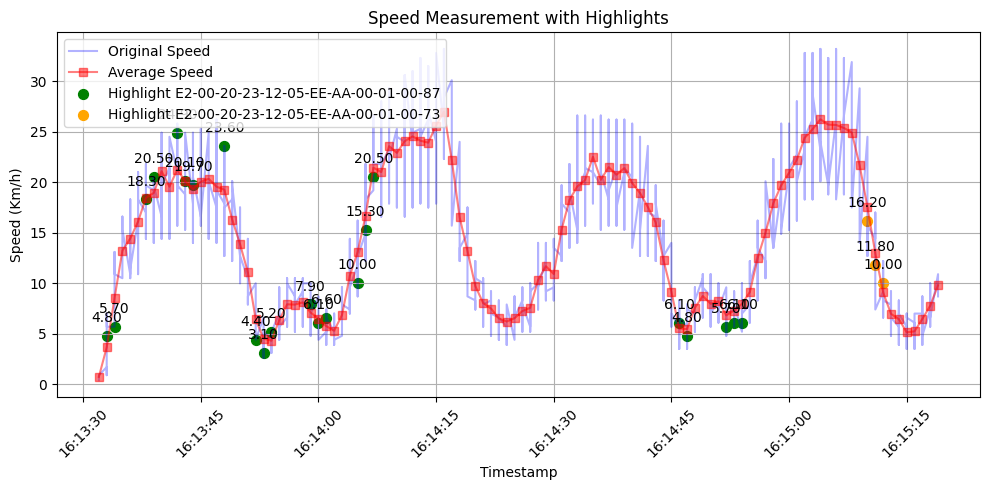

In [290]:
df = pd.read_csv('kalibrasi 40.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(df.index[1986:2174])
df = df.drop(df.index[0:34])
df.set_index('Timestamp', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-',alpha=0.3)

average_speed_per_second = df['Speed'].resample('1S').mean() # rata-rata kecepatan tiap detik 

plt.plot(average_speed_per_second.index, average_speed_per_second, marker='s', color='red', label='Average Speed',alpha = 0.5)

# Menandai Tag ID yang terbaca pada grafik 
highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['green', 'orange']

# Menambahkan kerterangan pada Tag ID yang udah di tandai 
tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        print(group)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

                    Tag Status                               Tag ID  Speed  \
Timestamp                                                                    
2024-06-09 16:13:33      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    4.8   
2024-06-09 16:13:34      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    5.7   
2024-06-09 16:13:38      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   18.3   
2024-06-09 16:13:39      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   20.5   
2024-06-09 16:13:42      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   24.9   
2024-06-09 16:13:43      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   20.1   
2024-06-09 16:13:44      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   19.7   
2024-06-09 16:13:48      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87   23.6   
2024-06-09 16:13:52      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    4.4   
2024-06-09 16:13:53      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00-87    3.1   
2024-06-09 16:13:54      TAG 4  E2-00-20-23-12-05-EE-AA-00-01-00

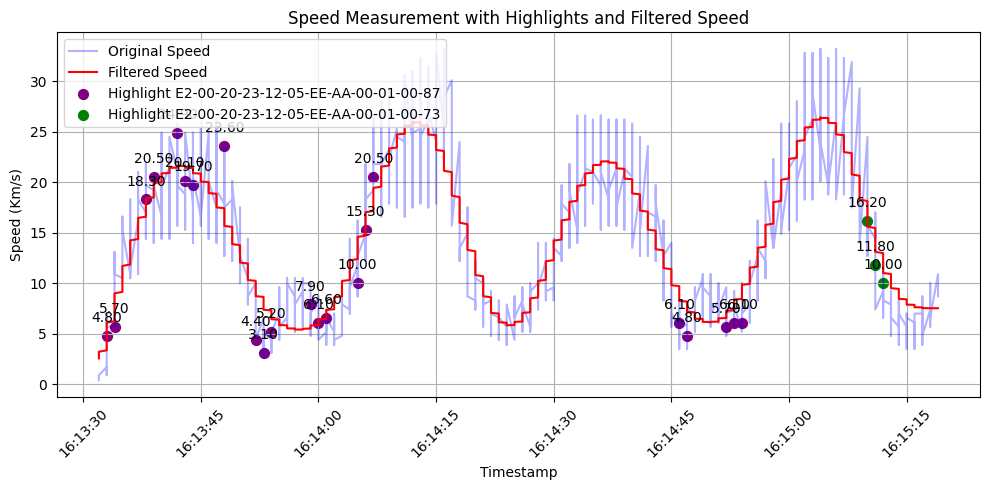

In [303]:
def apply_low_pass_filter(speed_data):
    cutoff_frequency = 0.008 
    order = 4

    # Set up the low-pass filter
    b, a = butter(order, cutoff_frequency, btype='low')

    # Apply the filter to the speed data
    filtered_speed_data = filtfilt(b, a, speed_data)

    return filtered_speed_data

df = pd.read_csv('kalibrasi 40.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])   
df = df.drop(df.index[1986:2174])
df = df.drop(df.index[0:34])

df.set_index('Timestamp', inplace=True)

# Apply low-pass filter to the speed data
df['Filtered Speed'] = apply_low_pass_filter(df['Speed'])

plt.figure(figsize=(10, 5))

plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-', alpha=0.3)
plt.plot(df.index, df['Filtered Speed'], label='Filtered Speed',color='red', linestyle='-', alpha=1,)

highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['purple', 'green']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        print(group)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights and Filtered Speed')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/s)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

plt.show()

Kalibrasi 40 Keempat

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\1482900658.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  average_speed_per_second = df['Speed'].resample('1S').mean()


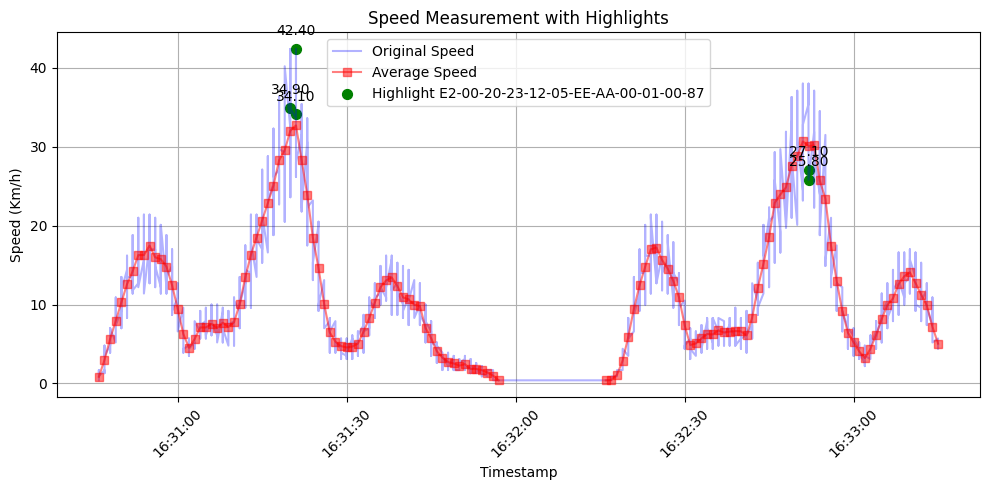

In [293]:
df = pd.read_csv('kalibrasi 40 keempat.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(df.index[2340:2382])
df.set_index('Timestamp', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-',alpha=0.3)

average_speed_per_second = df['Speed'].resample('1S').mean()

plt.plot(average_speed_per_second.index, average_speed_per_second, marker='s', color='red', label='Average Speed',alpha = 0.5)


highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['green', 'orange']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

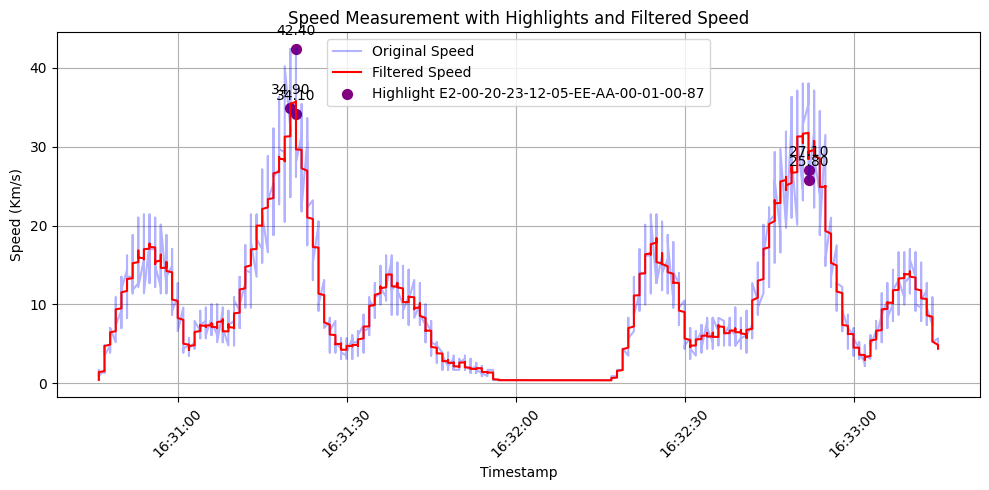

In [350]:
def apply_low_pass_filter(speed_data):
    cutoff_frequency = 0.1
    order = 4

    # Set up the low-pass filter
    b, a = butter(order, cutoff_frequency, btype='low')

    # Apply the filter to the speed data
    filtered_speed_data = filtfilt(b, a, speed_data)

    return filtered_speed_data

df = pd.read_csv('kalibrasi 40 keempat.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])   
df = df.drop(df.index[2340:2382])

df.set_index('Timestamp', inplace=True)

# Apply low-pass filter to the speed data
df['Filtered Speed'] = apply_low_pass_filter(df['Speed'])

plt.figure(figsize=(10, 5))

plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-', alpha=0.3)
plt.plot(df.index, df['Filtered Speed'], label='Filtered Speed',color='red', linestyle='-', alpha=1,)

highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['purple', 'purple']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights and Filtered Speed')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/s)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

plt.show()

KALIBRASI DATA 40 KETIGA 

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\2088860628.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  average_speed_per_second = df['Speed'].resample('1S').mean()


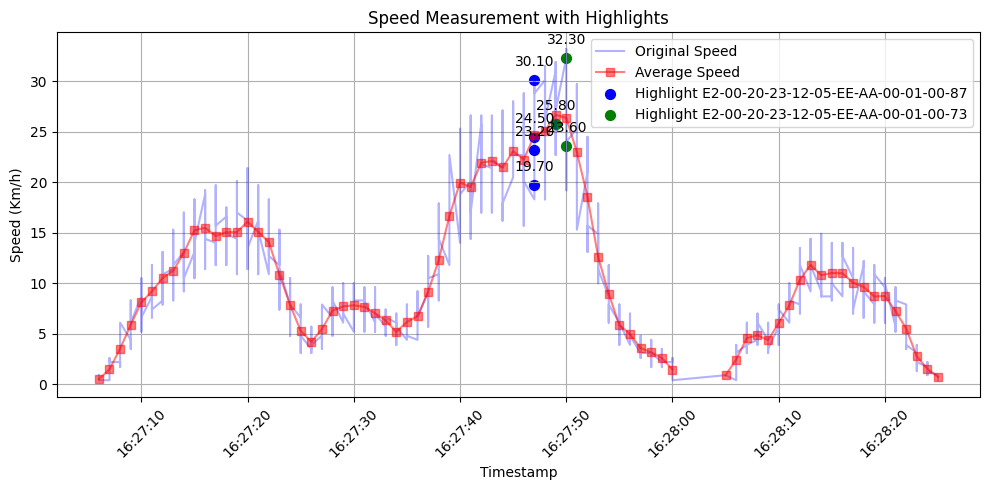

In [304]:
df = pd.read_csv('kalibrasi 40 ketiga.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(df.index[1345:1370])

df.set_index('Timestamp', inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-',alpha=0.3)


average_speed_per_second = df['Speed'].resample('1S').mean()


plt.plot(average_speed_per_second.index, average_speed_per_second, marker='s', color='red', label='Average Speed',alpha=0.5)


highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['blue', 'green']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

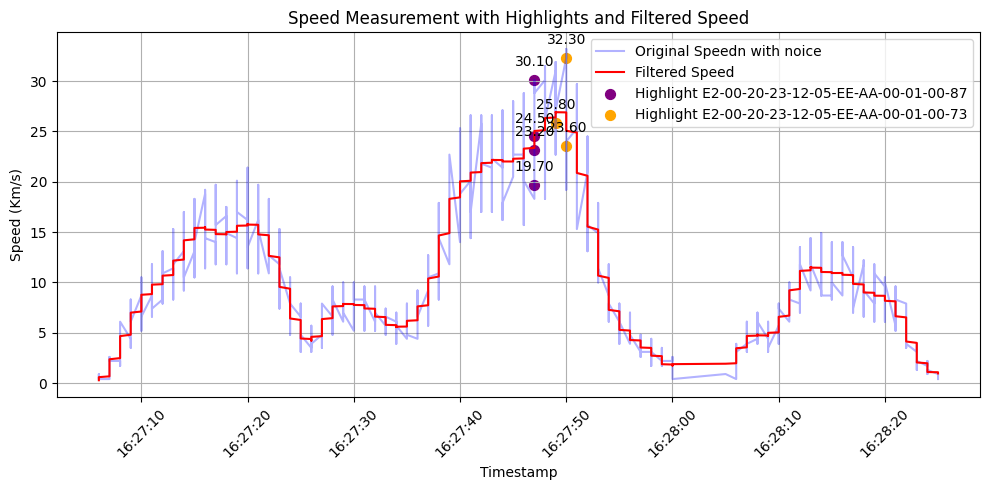

In [315]:
def apply_low_pass_filter(speed_data):
    cutoff_frequency = 0.03
    order = 4

    # Set up the low-pass filter
    b, a = butter(order, cutoff_frequency, btype='low')

    # Apply the filter to the speed data
    filtered_speed_data = filtfilt(b, a, speed_data)

    return filtered_speed_data

df = pd.read_csv('kalibrasi 40 ketiga.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])   
df = df.drop(df.index[1345:1370])

df.set_index('Timestamp', inplace=True)

# Apply low-pass filter to the speed data
df['Filtered Speed'] = apply_low_pass_filter(df['Speed'])

plt.figure(figsize=(10, 5))

plt.plot(df.index, df['Speed'], label='Original Speedn with noice', color='blue', linestyle='-', alpha=0.3)
plt.plot(df.index, df['Filtered Speed'], label='Filtered Speed',color='red', linestyle='-', alpha=1,)

highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['purple', 'orange']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights and Filtered Speed')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/s)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

plt.show()

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\925964425.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_df = df.resample('1S').interpolate('linear')
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\925964425.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  resampled_df = df.resample('1S').interpolate('linear')
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\925964425.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_df = df.resample('1S').interpolate('linear')
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\925964425.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  resampled_d

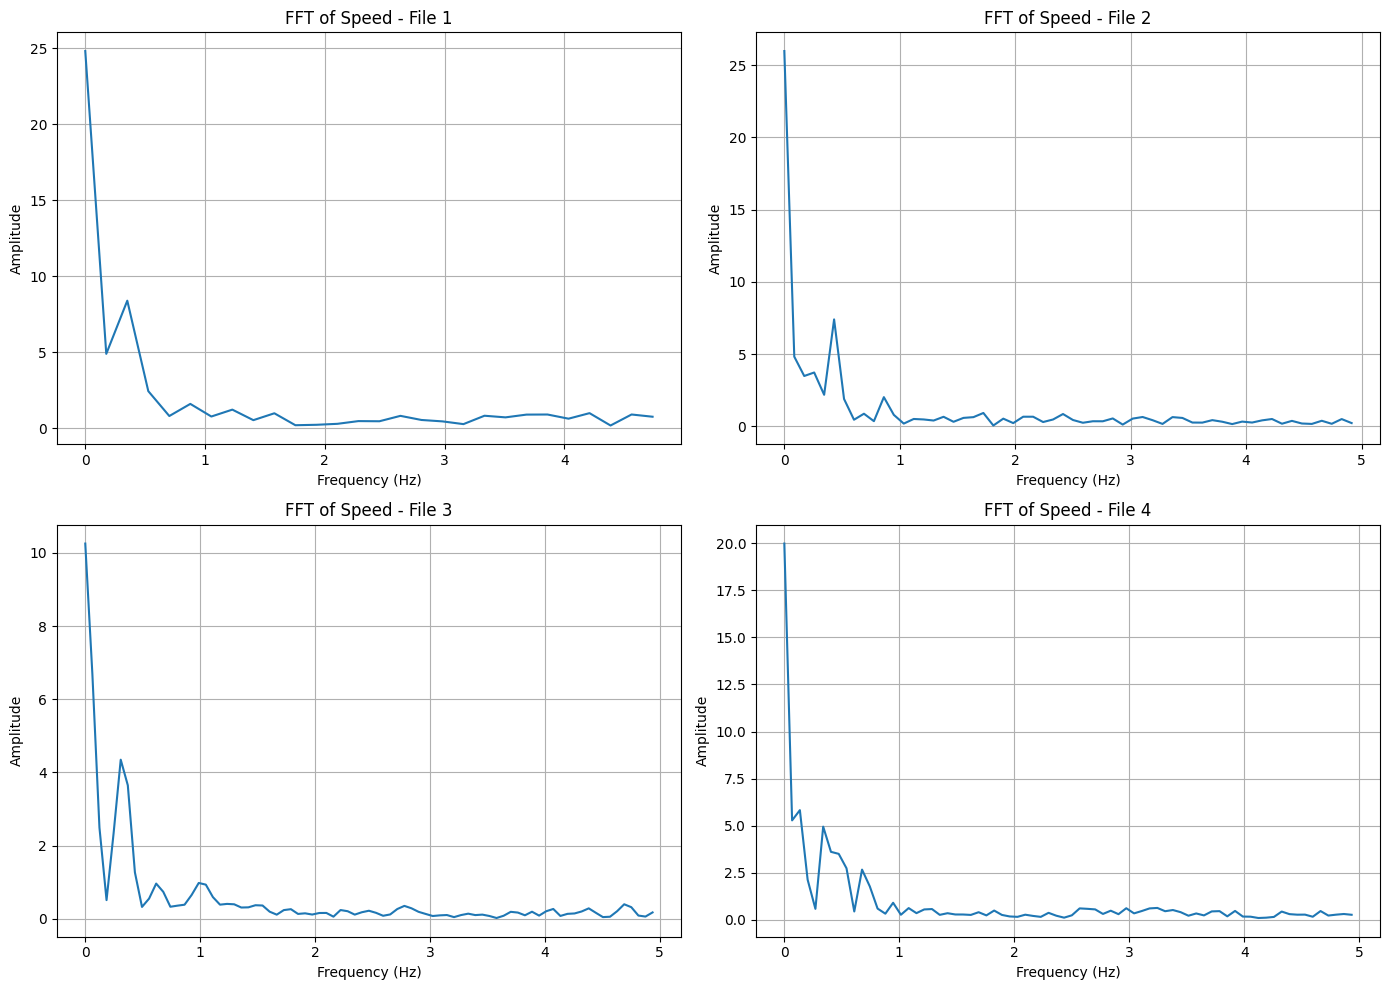

In [200]:
def process_file(file_path):
    # Membaca data dari file CSV
    df = pd.read_csv(file_path)

    # Mengonversi kolom Timestamp ke tipe datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Menghapus data yang tidak diperlukan
    df = df.drop(df.index[2305:2383])

    # Mengonversi kolom Speed ke numerik
    df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

    # Menghapus baris dengan nilai Speed yang hilang
    df = df.dropna(subset=['Speed'])

    # Set the index to the Timestamp column
    df.set_index('Timestamp', inplace=True)

    # Remove duplicate index values
    df = df[~df.index.duplicated(keep='first')]

    # Resampling dengan interval waktu yang tetap, misalnya 1 detik
    resampled_df = df.resample('1S').interpolate('linear')

    # Mengambil data kecepatan dan timestamp dari data yang telah di-resample
    speeds = resampled_df['Speed'].values

    # Interval sampling setelah resampling
    T = 0.1  # Karena kita resample dengan interval 1 detik
    N = len(speeds)

    # Menghitung FFT
    yf = fft(speeds)
    xf = fftfreq(N, T)[:N//2]

    return xf, yf, N

# Daftar file paths
file_paths = [
    'kalibrasi30-40.csv',
    'kalibrasi 40 kedua.csv',
    'kalibrasi 40 ketiga.csv',
    'kalibrasi 40 keempat.csv'
]

# Plot hasil FFT untuk setiap file
plt.figure(figsize=(14, 10))

for i, file_path in enumerate(file_paths):
    xf, yf, N = process_file(file_path)
    plt.subplot(2, 2, i+1)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title(f'FFT of Speed - File {i+1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\1482900658.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  average_speed_per_second = df['Speed'].resample('1S').mean()


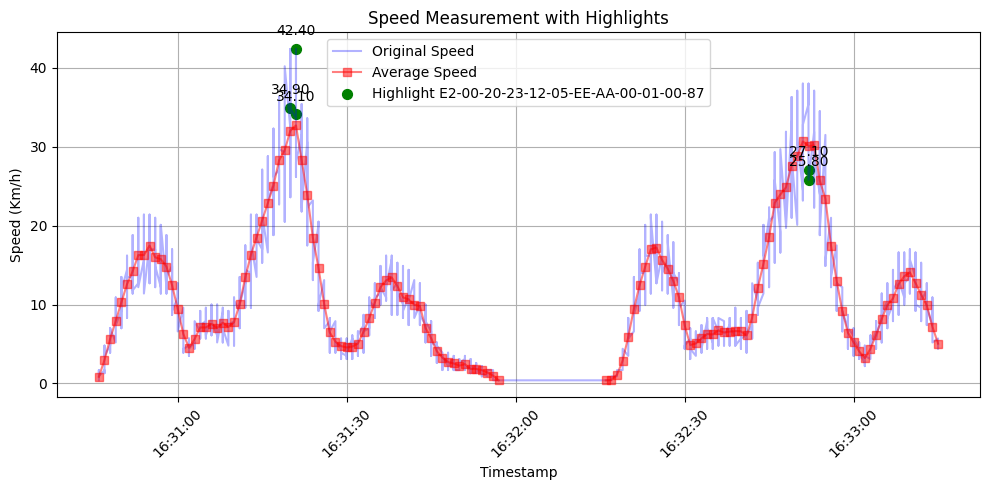

In [ ]:
df = pd.read_csv('kalibrasi 40 keempat.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.drop(df.index[2340:2382])

df.set_index('Timestamp', inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Speed'], label='Original Speed', color='blue', linestyle='-',alpha=0.3)


average_speed_per_second = df['Speed'].resample('1S').mean()


plt.plot(average_speed_per_second.index, average_speed_per_second, marker='s', color='red', label='Average Speed',alpha = 0.5)


highlight_tags = ["E2-00-20-23-12-05-EE-AA-00-01-00-87", "E2-00-20-23-12-05-EE-AA-00-01-00-73"]
colors = ['green', 'orange']

tag_groups = df.groupby('Tag ID')
for tag_id, color in zip(highlight_tags, colors):
    if tag_id in tag_groups.groups:
        group = tag_groups.get_group(tag_id)
        plt.scatter(group.index, group['Speed'], label=f'Highlight {tag_id}', s=50, marker='o', color=color)
        
        for time, speed in group['Speed'].items():
            plt.annotate(f'{speed:.2f}', (time, speed), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Speed Measurement with Highlights')
plt.xlabel('Timestamp')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True)

CONTOH DATA FMCW

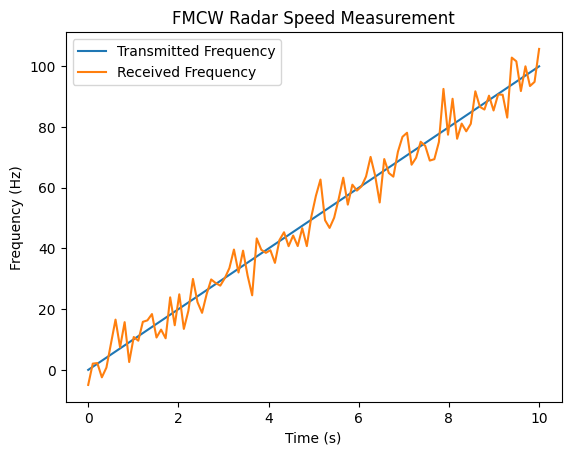

In [107]:
# Example data: replace with your actual radar data
time = np.linspace(0, 10, 100)  # Time in seconds
frequency_transmitted = np.linspace(0, 100, 100)  # Frequency in Hz
frequency_received = frequency_transmitted + np.random.normal(0, 5, 100)  # Simulated Doppler shift

plt.figure()
plt.title('FMCW Radar Speed Measurement')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.plot(time, frequency_transmitted, label='Transmitted Frequency')
plt.plot(time, frequency_received, label='Received Frequency')
plt.legend()
plt.show()

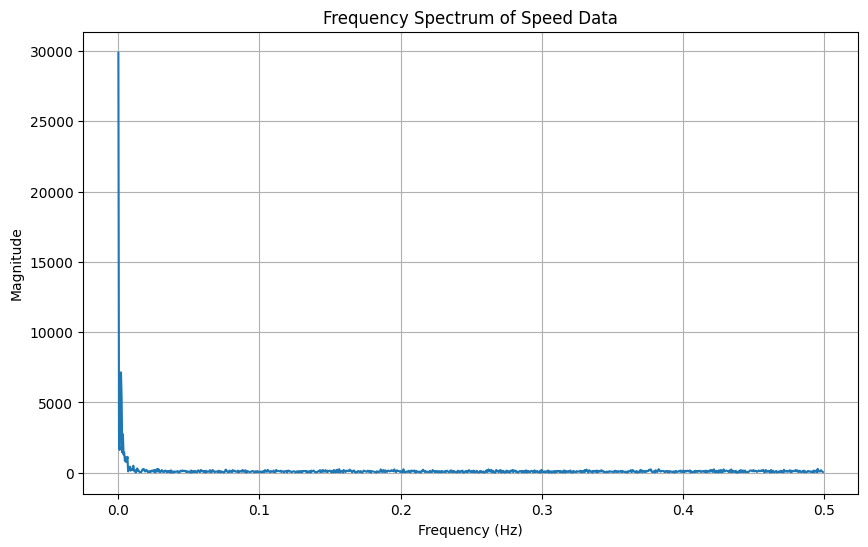

In [233]:
csv_file_path = 'kalibrasi 40.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Step 2: Perform FFT
sampling_rate = 1  # Replace with your actual sampling rate in Hz
n = len(speed_data)
fft_result = np.fft.fft(speed_data)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Step 3: Plot the Frequency Spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Plot only the positive frequencies
plt.title('Frequency Spectrum of Speed Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

nilai fft [27675.6       +6.57252031e-13j -2169.59838308-5.82951120e+02j
 -2047.30094932-2.15628613e+02j ... -1095.93559711+3.13096023e+03j
 -2047.30094932+2.15628613e+02j -2169.59838308+5.82951120e+02j]
nilai frequencies:  [ 0.         0.0005152  0.0010304 ... -0.0015456 -0.0010304 -0.0005152]
nilai fft_magnitude:  [27675.6         2246.55050075  2058.62499636 ...  3317.22577162
  2058.62499636  2246.55050075]


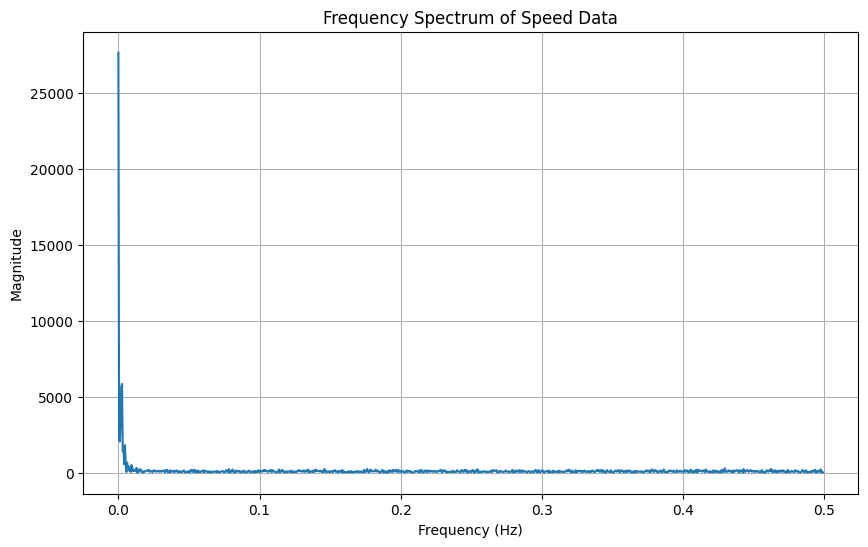

In [238]:
csv_file_path = 'kalibrasi 40 kedua.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Step 2: Perform FFT
sampling_rate = 1  # Replace with your actual sampling rate in Hz
n = len(speed_data)
fft_result = np.fft.fft(speed_data)
fft_magnitude = np.abs(fft_result)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

print('nilai fft',fft_result)
print('nilai frequencies: ',frequencies)
print('nilai fft_magnitude: ',fft_magnitude)
# Step 3: Plot the Frequency Spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Plot only the positive frequencies
plt.title('Frequency Spectrum of Speed Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

Value of positive_freqs: 
 [0.         0.0005152  0.0010304  0.0015456  0.00206079 0.00257599
 0.00309119 0.00360639 0.00412159 0.00463679 0.00515198 0.00566718
 0.00618238 0.00669758 0.00721278 0.00772798 0.00824317 0.00875837
 0.00927357 0.00978877 0.01030397 0.01081917 0.01133436 0.01184956
 0.01236476 0.01287996 0.01339516 0.01391036 0.01442555 0.01494075
 0.01545595 0.01597115 0.01648635 0.01700155 0.01751674 0.01803194
 0.01854714 0.01906234 0.01957754 0.02009274 0.02060793 0.02112313
 0.02163833 0.02215353 0.02266873 0.02318393 0.02369912 0.02421432
 0.02472952 0.02524472 0.02575992 0.02627512 0.02679031 0.02730551
 0.02782071 0.02833591 0.02885111 0.02936631 0.0298815  0.0303967
 0.0309119  0.0314271  0.0319423  0.0324575  0.03297269 0.03348789
 0.03400309 0.03451829 0.03503349 0.03554869 0.03606388 0.03657908
 0.03709428 0.03760948 0.03812468 0.03863988 0.03915507 0.03967027
 0.04018547 0.04070067 0.04121587 0.04173107 0.04224626 0.04276146
 0.04327666 0.04379186 0.04430706 0.

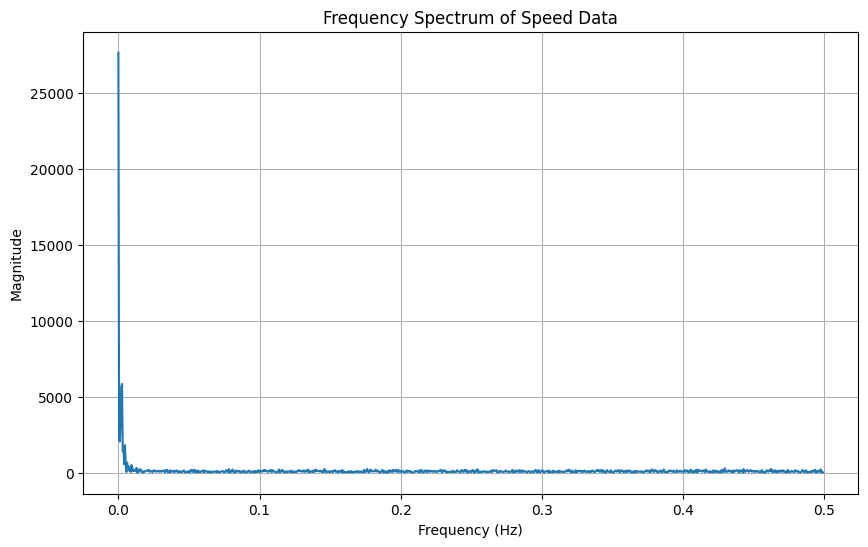

In [241]:

plt.figure(figsize=(10, 6))
positive_freqs = frequencies[:len(frequencies)//2]
positive_magnitudes = fft_magnitude[:len(fft_magnitude)//2]

print("Value of positive_freqs: \n",positive_freqs)
print("Value of positive_magnitudes: \n",positive_magnitudes)
plt.plot(positive_freqs, positive_magnitudes)
plt.title('Frequency Spectrum of Speed Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

filteret data : [-3.902595   -3.50535428 -3.60866987 ... -1.10438594 -1.03819578
 -0.97208241]


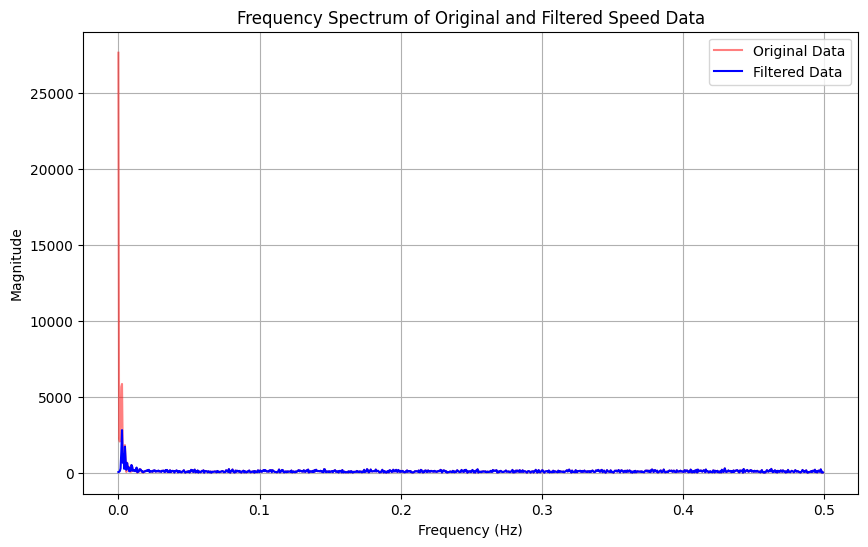

In [264]:
from scipy.signal import butter, filtfilt

cutoff_frequency = 0.005  # This is a normalized frequency, where 1.0 corresponds to Nyquist frequency (sampling_rate / 2)
csv_file_path = 'kalibrasi 40 kedua.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values
# Set up the filter
order = 4  # Order of the filter (adjust as needed)
b, a = butter(order, cutoff_frequency, btype='high')

# Apply the filter to your speed data
filtered_speed_data = filtfilt(b, a, speed_data)

print('filteret data :',filtered_speed_data)
# Plot original and filtered speed data
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_magnitudes, label='Original Data',alpha = 0.5,color='red')
plt.plot(positive_freqs, np.abs(np.fft.fft(filtered_speed_data))[:len(positive_magnitudes)], label='Filtered Data',color = 'blue')
plt.title('Frequency Spectrum of Original and Filtered Speed Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.show()

PENERAPAN NOICE PADA KALIBRASI 40 KMPH dengan 

Filter BPF :  [4.30256783 4.40532679 4.50864207 ... 6.70396315 6.70396309 6.70396304]
Flter HPF:  [-1.03556516e-02 -1.21893130e-02 -1.23608925e-02 ... -1.59586140e-08
 -1.04001261e-08  3.10964980e-09]


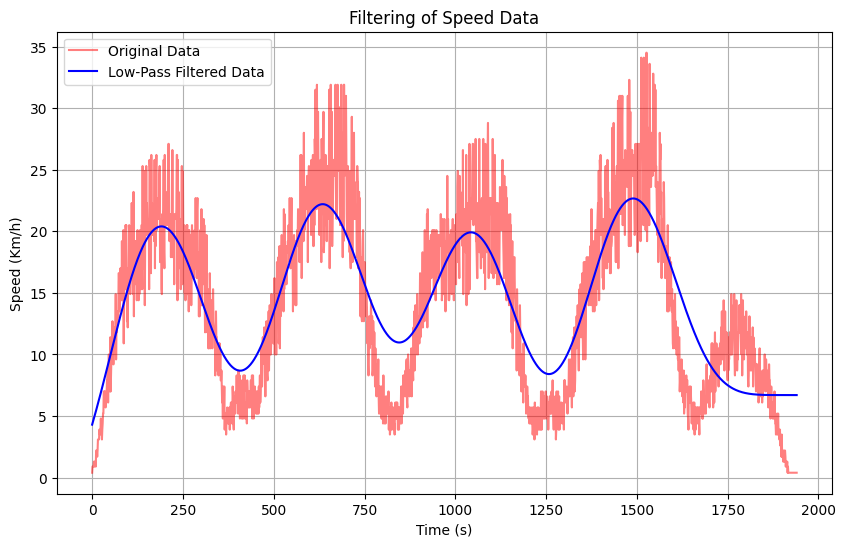

In [316]:
low_cutoff_frequency = 0.005  # Low-pass filter cutoff frequency
high_cutoff_frequency = 0.1  # High-pass filter cutoff frequency

# Read data from CSV file
csv_file_path = 'kalibrasi 40 kedua.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Set up the low-pass filter
low_order = 4  # Order of the low-pass filter (adjust as needed)
low_b, low_a = butter(low_order, low_cutoff_frequency, btype='low')

# Apply the low-pass filter to the speed data
low_filtered_speed_data = filtfilt(low_b, low_a, speed_data)

# Set up the high-pass filter
high_order = 4  # Order of the high-pass filter (adjust as needed)
high_b, high_a = butter(high_order, high_cutoff_frequency, btype='high')

# Apply the high-pass filter to the low-pass filtered data
high_filtered_speed_data = filtfilt(high_b, high_a, low_filtered_speed_data)

print("Filter BPF : ",low_filtered_speed_data)
print("Flter HPF: ",high_filtered_speed_data)
# Plot original, low-pass filtered, and high-pass filtered speed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, speed_data, label='Original Data', alpha=0.5, color='red')
plt.plot(data.index, low_filtered_speed_data, label='Low-Pass Filtered Data', color='blue')
# plt.plot(data.index, high_filtered_speed_data, label='High-Pass Filtered Data', color='green')
plt.title('Filtering of Speed Data')
plt.xlabel('Time (s)')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.grid()
plt.show()

Filter BPF :  [ 2.49073572  2.55630464  2.62229806 ... 10.18225079 10.18224932
 10.18224814]
Flter HPF:  [-6.73881740e-03 -8.02080562e-03 -8.17529827e-03 ... -5.35270705e-07
 -3.70294979e-07 -1.70130227e-08]


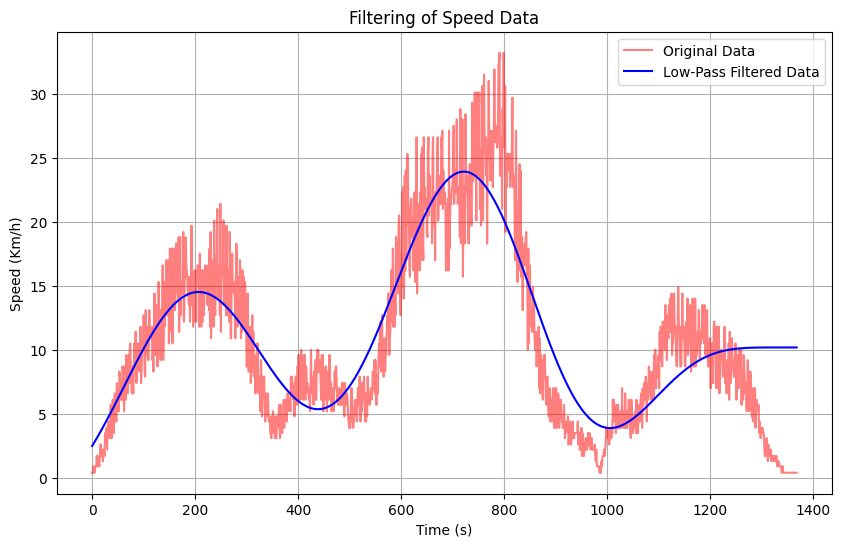

In [318]:
low_cutoff_frequency = 0.005  # Low-pass filter cutoff frequency
high_cutoff_frequency = 0.1  # High-pass filter cutoff frequency

# Read data from CSV file
csv_file_path = 'kalibrasi 40 ketiga.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Set up the low-pass filter
low_order = 4  # Order of the low-pass filter (adjust as needed)
low_b, low_a = butter(low_order, low_cutoff_frequency, btype='low')

# Apply the low-pass filter to the speed data
low_filtered_speed_data = filtfilt(low_b, low_a, speed_data)

# Set up the high-pass filter
high_order = 4  # Order of the high-pass filter (adjust as needed)
high_b, high_a = butter(high_order, high_cutoff_frequency, btype='high')

# Apply the high-pass filter to the low-pass filtered data
high_filtered_speed_data = filtfilt(high_b, high_a, low_filtered_speed_data)

print("Filter BPF : ",low_filtered_speed_data)
print("Flter HPF: ",high_filtered_speed_data)
# Plot original, low-pass filtered, and high-pass filtered speed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, speed_data, label='Original Data', alpha=0.5, color='red')
plt.plot(data.index, low_filtered_speed_data, label='Low-Pass Filtered Data', color='blue')
# plt.plot(data.index, high_filtered_speed_data, label='High-Pass Filtered Data', color='green')
plt.title('Filtering of Speed Data')
plt.xlabel('Time (s)')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.grid()
plt.show()

Filter BPF :  [2.69242908 2.76566314 2.83956848 ... 6.988108   6.98810982 6.98811126]
Flter HPF:  [-7.88478976e-03 -9.63653230e-03 -9.93936664e-03 ...  6.32845460e-07
  4.45044467e-07  1.93194901e-08]


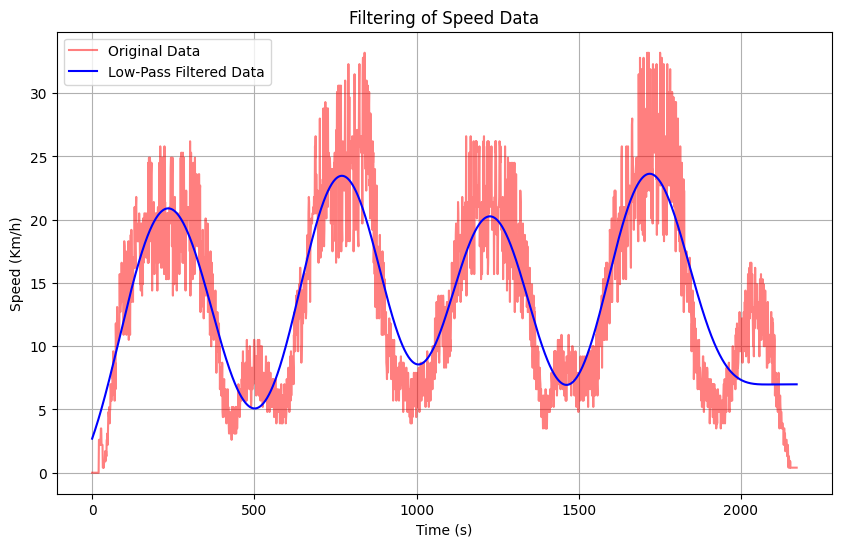

In [320]:
low_cutoff_frequency = 0.005  # Low-pass filter cutoff frequency
high_cutoff_frequency = 0.1  # High-pass filter cutoff frequency

# Read data from CSV file
csv_file_path = 'kalibrasi 40.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Set up the low-pass filter
low_order = 4  # Order of the low-pass filter (adjust as needed)
low_b, low_a = butter(low_order, low_cutoff_frequency, btype='low')

# Apply the low-pass filter to the speed data
low_filtered_speed_data = filtfilt(low_b, low_a, speed_data)

# Set up the high-pass filter
high_order = 4  # Order of the high-pass filter (adjust as needed)
high_b, high_a = butter(high_order, high_cutoff_frequency, btype='high')

# Apply the high-pass filter to the low-pass filtered data
high_filtered_speed_data = filtfilt(high_b, high_a, low_filtered_speed_data)

print("Filter BPF : ",low_filtered_speed_data)
print("Flter HPF: ",high_filtered_speed_data)
# Plot original, low-pass filtered, and high-pass filtered speed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, speed_data, label='Original Data', alpha=0.5, color='red')
plt.plot(data.index, low_filtered_speed_data, label='Low-Pass Filtered Data', color='blue')
# plt.plot(data.index, high_filtered_speed_data, label='High-Pass Filtered Data', color='green')
plt.title('Filtering of Speed Data')
plt.xlabel('Time (s)')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.grid()
plt.show()

Filter BPF :  [3.82553906 3.9114263  3.99758231 ... 7.43153215 7.43153929 7.43154491]
Flter HPF:  [-8.29174616e-03 -9.50730739e-03 -9.52248520e-03 ...  2.44678894e-06
  1.72086374e-06  5.99849476e-08]


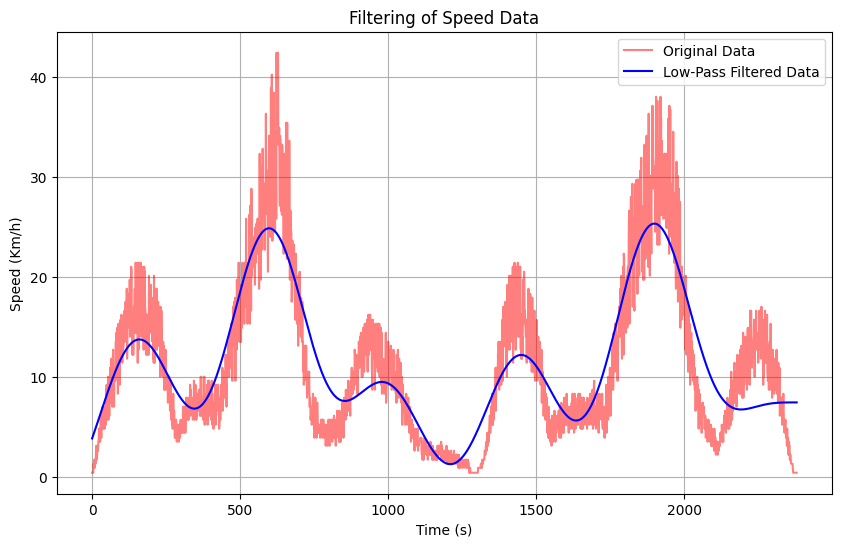

In [322]:
low_cutoff_frequency = 0.005  # Low-pass filter cutoff frequency
high_cutoff_frequency = 0.1  # High-pass filter cutoff frequency

# Read data from CSV file
csv_file_path = 'kalibrasi 40 keempat.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Set up the low-pass filter
low_order = 4  # Order of the low-pass filter (adjust as needed)
low_b, low_a = butter(low_order, low_cutoff_frequency, btype='low')

# Apply the low-pass filter to the speed data
low_filtered_speed_data = filtfilt(low_b, low_a, speed_data)

# Set up the high-pass filter
high_order = 4  # Order of the high-pass filter (adjust as needed)
high_b, high_a = butter(high_order, high_cutoff_frequency, btype='high')

# Apply the high-pass filter to the low-pass filtered data
high_filtered_speed_data = filtfilt(high_b, high_a, low_filtered_speed_data)

print("Filter BPF : ",low_filtered_speed_data)
print("Flter HPF: ",high_filtered_speed_data)
# Plot original, low-pass filtered, and high-pass filtered speed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, speed_data, label='Original Data', alpha=0.5, color='red')
plt.plot(data.index, low_filtered_speed_data, label='Low-Pass Filtered Data', color='blue')
# plt.plot(data.index, high_filtered_speed_data, label='High-Pass Filtered Data', color='green')
plt.title('Filtering of Speed Data')
plt.xlabel('Time (s)')
plt.ylabel('Speed (Km/h)')
plt.legend()
plt.grid()
plt.show()

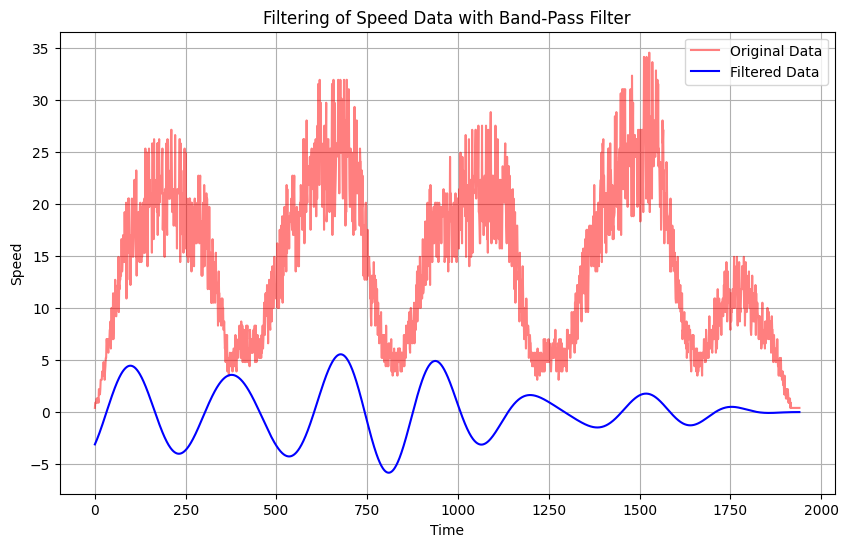

In [344]:
# Define cutoff frequencies for the band-pass filter
low_cutoff_frequency = 0.005  # Low-pass filter cutoff frequency
high_cutoff_frequency = 0.01  # High-pass filter cutoff frequency

# Read data from CSV file
csv_file_path = 'kalibrasi 40 kedua.csv'  # Replace with your CSV file path
data = pd.read_csv(csv_file_path)
speed_data = data['Speed'].values

# Set up the band-pass filter
order = 4  # Order of the band-pass filter (adjust as needed)
b, a = butter(order, [low_cutoff_frequency, high_cutoff_frequency], btype='band')

# Apply the band-pass filter to the speed data
filtered_speed_data = filtfilt(b, a, speed_data)

# Plot original and filtered speed data
plt.figure(figsize=(10, 6))
plt.plot(data.index, speed_data, label='Original Data', alpha=0.5, color='red')
plt.plot(data.index, filtered_speed_data, label='Filtered Data', color='blue')
plt.title('Filtering of Speed Data with Band-Pass Filter')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend()
plt.grid()
plt.show()

C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\749855980.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_df = df.resample('1S').interpolate('linear')
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\749855980.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  resampled_df = df.resample('1S').interpolate('linear')
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\749855980.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_df = df.resample('1S').interpolate('linear')
C:\Users\M ALIF F\AppData\Local\Temp\ipykernel_19848\749855980.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  resampled_d

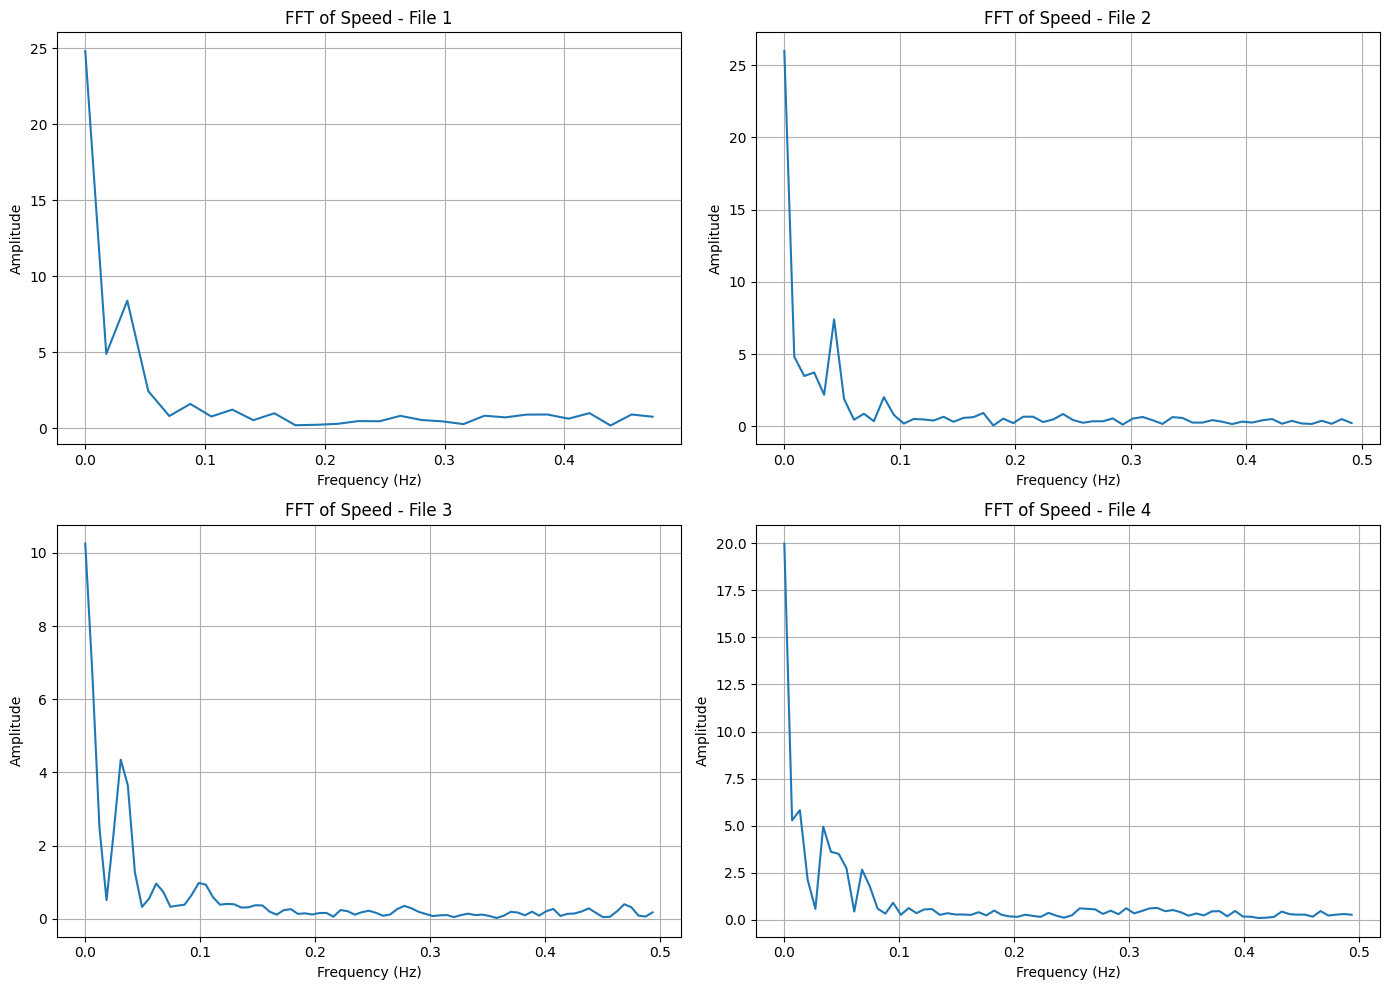

In [235]:
def process_file(file_path):
    # Membaca data dari file CSV
    df = pd.read_csv(file_path)

    # Mengonversi kolom Timestamp ke tipe datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Menghapus data yang tidak diperlukan
    df = df.drop(df.index[2305:2383])

    # Mengonversi kolom Speed ke numerik
    df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

    # Menghapus baris dengan nilai Speed yang hilang
    df = df.dropna(subset=['Speed'])

    # Set the index to the Timestamp column
    df.set_index('Timestamp', inplace=True)

    # Remove duplicate index values
    df = df[~df.index.duplicated(keep='first')]

    # Resampling dengan interval waktu yang tetap, misalnya 1 detik
    resampled_df = df.resample('1S').interpolate('linear')

    # Mengambil data kecepatan dari data yang telah di-resample
    speeds = resampled_df['Speed'].values

    # Interval sampling setelah resampling (1 detik)
    sampling_rate = 1.0  # Sampling interval in seconds
    N = len(speeds)

    # Menghitung FFT
    fft_result = np.fft.fft(speeds)
    fft_magnitude = np.abs(fft_result) / N  # Normalize the FFT output
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

    # Only return the positive frequencies and their magnitudes
    positive_frequencies = frequencies[:N//2]
    positive_magnitudes = fft_magnitude[:N//2] * 2
    
    return positive_frequencies, positive_magnitudes

# Daftar file paths
file_paths = [
    'kalibrasi30-40.csv',
    'kalibrasi 40 kedua.csv',
    'kalibrasi 40 ketiga.csv',
    'kalibrasi 40 keempat.csv',
]

# Plot hasil FFT untuk setiap file
plt.figure(figsize=(14, 10))

for i, file_path in enumerate(file_paths):
    frequencies, magnitudes = process_file(file_path)
    plt.subplot(2, 2, i+1)
    plt.plot(frequencies, magnitudes)
    plt.title(f'FFT of Speed - File {i+1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()

In [32]:
import serial
import csv
import time
import json

# Function to read data from the serial port and save to CSV
def read_serial_to_csv(port, baudrate, csv_filename, duration):
    # Open the serial port
    ser = serial.Serial(port, baudrate, timeout=1)
    
    # Open the CSV file for writing
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header
        writer.writerow(["I", "Q"])
        
        # Record the start time
        start_time = time.time()
        
        # Buffers for I and Q components
        I_buffer = []
        Q_buffer = []
        
        # Loop to read data for the specified duration
        while time.time() - start_time < duration:
            # Read a line from the serial port
            line = ser.readline().decode('utf-8').strip()
            
            if line:
                try:
                    # Parse the JSON data
                    data = json.loads(line)
                    if isinstance(data, dict):
                        if "I" in data:
                            I_buffer = data["I"]
                        if "Q" in data:
                            Q_buffer = data["Q"]
                    
                    # Check if both buffers have data
                    if I_buffer and Q_buffer:
                        if len(I_buffer) == len(Q_buffer):
                            for I, Q in zip(I_buffer, Q_buffer):
                                # Write the I and Q values to the CSV file
                                writer.writerow([I, Q])
                            print(f"Written {len(I_buffer)} pairs of I and Q values.")
                            
                            # Clear the buffers after writing to CSV
                            I_buffer.clear()
                            Q_buffer.clear()
                        else:
                            print(f"Mismatched lengths: I={len(I_buffer)}, Q={len(Q_buffer)}")
                except json.JSONDecodeError:
                    print(f"Invalid JSON data: {line}")
                except TypeError as e:
                    print(f"TypeError: {e} - Data: {line}")
            time.sleep(0.01)  # Sleep for a short time to avoid busy-waiting
                
        # Close the serial port
        ser.close()
        print(f"Data logging stopped after {duration} seconds.")

# Parameters for the serial port and CSV file
serial_port = 'COM3'  # Replace with your serial port
baud_rate = 9600      # Replace with your baud rate
csv_file = 'radar_data.csv'
duration_seconds = 5  # Read data for 5 seconds

# Start reading data from the serial port and saving to CSV
read_serial_to_csv(serial_port, baud_rate, csv_file, duration_seconds)


Invalid JSON data: 2049,2043,2039,2041,2044,2041,2049,2043,2048,2049,2043,2043,2052,2043,2045,2041,2050,2043,2043,2045,2045,2043,2039,2039,2049,2051,2045,2042,2049,2043,2041,2045,2051,2051,2045,2043,2049,2051,2051,2044,2043,2042,2041,2051,2051,2045,2049,2051,2045,2043,2049,2049,2049,2049,2045,2045,2049,2043,2041,2049,2049,2041,2050,2051,2043,2041,2044,2043,2043,2049,2052,2043,2043,2051,2049,2051,2040,2045,2049,2045,2049,2049,2049,2043,2043,2049,2048,2049,2052,2044,2045,2049,2045,2043,2049,2053,2048,2044,2049,2043,2045,2049,2041,2052,2043,2044,2043,2049,2049,2045,2041,2043,2049,2044,2045,2043,2048,2049,2050,2045,2053,2043,2049,2043,2049,2045,2042,2049,2041,2049,2043,2045,2045,2049,2045,2043,2043,2049,2041,2041,2039,2039,2043,2037,2043,2044,2043,2039,2042,2043,2043,2041,2041,2043,2043,2045,2041,2041,2037,2041,2041,2043,2049,2041,2045,2043,2049,2042,2049,2043,2039,2045,2041,2039,2043,2041,2043,2043,2042,2049,2041,2043,2039,2041,2043,2049,2048,2043,2043,2042,2043,2041,2039,2041,2043,2045,2

      I     Q
0  2046  2051
1  2042  2051
2  2042  2043
3  2045  2050
4  2040  2042


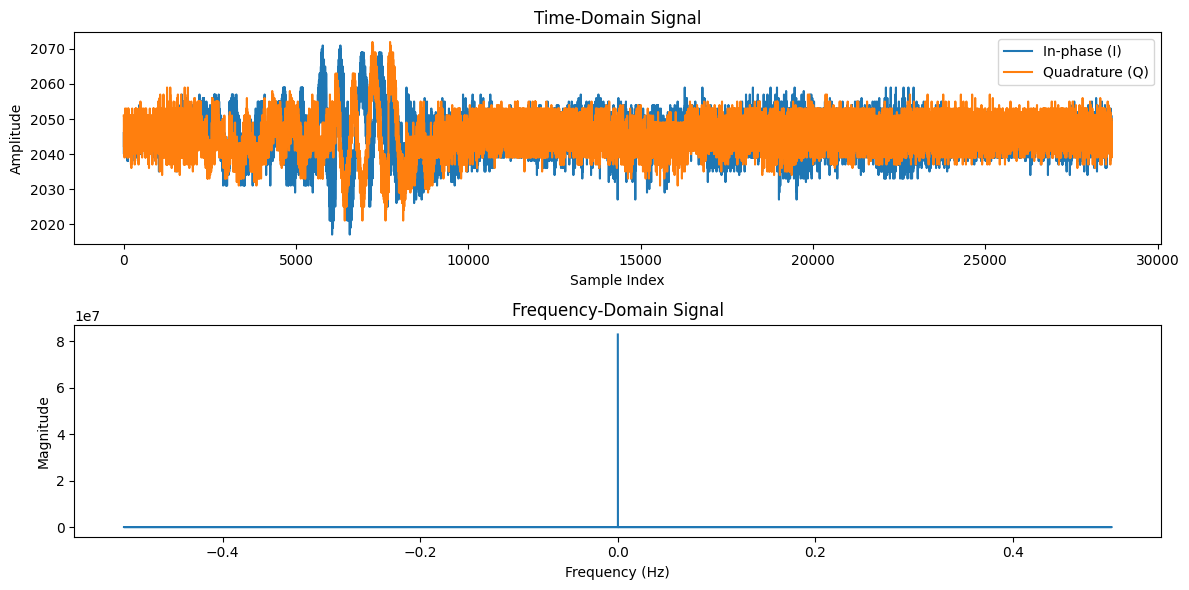

In [17]:
data = pd.read_csv('radar_data2.csv')
print(data.head())

I = data['I'].values
Q = data['Q'].values

## Extract I and Q components
I = data['I'].values
Q = data['Q'].values

# Convert to complex signal
signal = I + 1j * Q

# Perform Fourier Transform
fft_signal = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal))

# Get the magnitude spectrum
magnitude_spectrum = np.abs(fft_signal)

# Plot the time-domain signal (I and Q components)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(I, label='In-phase (I)')
plt.plot(Q, label='Quadrature (Q)')
plt.legend()
plt.title('Time-Domain Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, magnitude_spectrum)
plt.title('Frequency-Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()



      I     Q
0  2045  2041
1  2045  2045
2  2052  2055
3  2046  2049
4  2041  2043


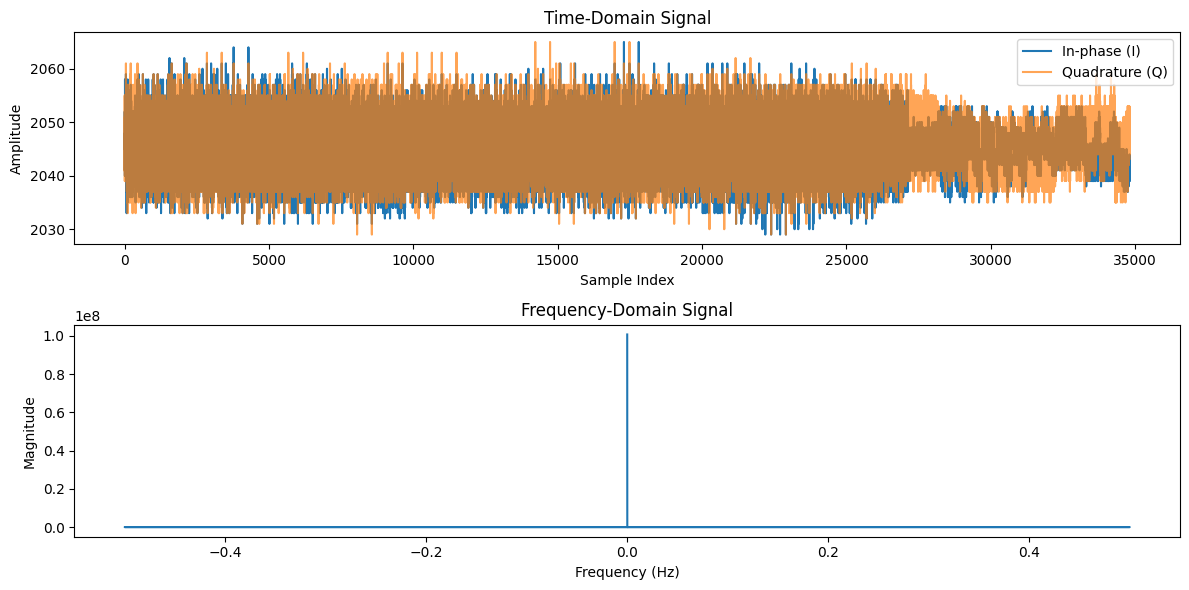

In [21]:
data = pd.read_csv('radar_data3.csv')
print(data.head())

I = data['I'].values
Q = data['Q'].values

## Extract I and Q components
I = data['I'].values
Q = data['Q'].values

# Convert to complex signal
signal = I + 1j * Q

# Perform Fourier Transform
fft_signal = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal))

# Get the magnitude spectrum
magnitude_spectrum = np.abs(fft_signal)

# Plot the time-domain signal (I and Q components)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(I, label='In-phase (I)')
plt.plot(Q, label='Quadrature (Q)', alpha = 0.7)
plt.legend()
plt.title('Time-Domain Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, magnitude_spectrum)
plt.title('Frequency-Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()



      I     Q
0  2042  2041
1  2037  2045
2  2051  2048
3  2044  2044
4  2032  2033


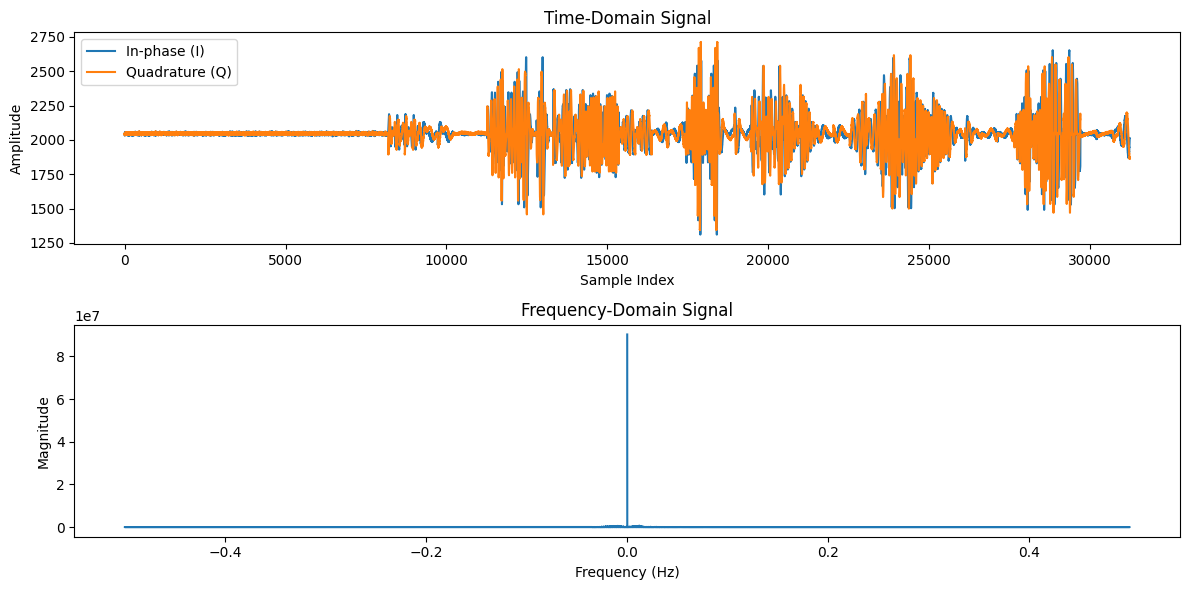

In [31]:
data = pd.read_csv('radar_data4.csv')
print(data.head())

I = data['I'].values
Q = data['Q'].values

## Extract I and Q components
I = data['I'].values
Q = data['Q'].values

# Convert to complex signal
signal = I + 1j * Q

# Perform Fourier Transform
fft_signal = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal))

# Get the magnitude spectrum
magnitude_spectrum = np.abs(fft_signal)

# Plot the time-domain signal (I and Q components)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(I, label='In-phase (I)')
plt.plot(Q, label='Quadrature (Q)')
plt.legend()
plt.title('Time-Domain Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, magnitude_spectrum)
plt.title('Frequency-Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

      I     Q
0  2059  2081
1  2058  2073
2  2063  2082
3  2067  2083
4  2064  2079


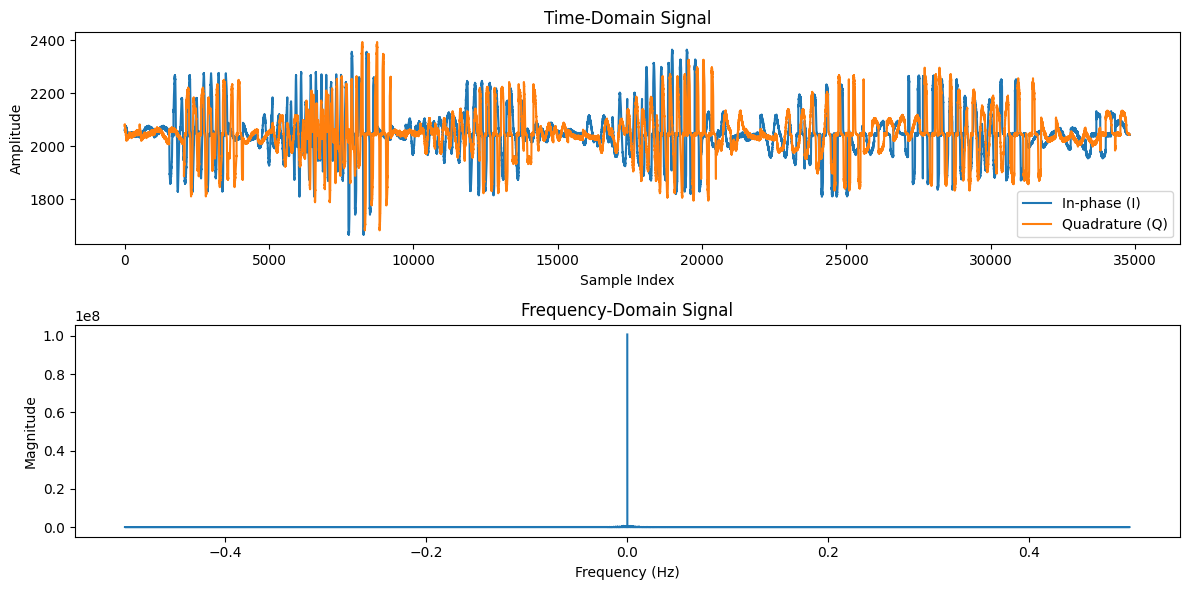

In [33]:
data = pd.read_csv('radar_data.csv')
print(data.head())

I = data['I'].values
Q = data['Q'].values

## Extract I and Q components
I = data['I'].values
Q = data['Q'].values

# Convert to complex signal
signal = I + 1j * Q

# Perform Fourier Transform
fft_signal = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal))

# Get the magnitude spectrum
magnitude_spectrum = np.abs(fft_signal)

# Plot the time-domain signal (I and Q components)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(I, label='In-phase (I)')
plt.plot(Q, label='Quadrature (Q)')
plt.legend()
plt.title('Time-Domain Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, magnitude_spectrum)
plt.title('Frequency-Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()